In [20]:
from models.model import ImagenTime
from utils.utils_data import gen_dataloader
from utils.utils import restore_state
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Define args as needed for gen_dataloader
class Args:
	def __init__(self):
		self.batch_size = 69696 # check this 
		self.shuffle = True
		self.num_workers = 4
		self.dataset = "fmri"    
		self.device = "cuda"
		self.use_stft = True
		self.diffusion_steps = 18
		self.n_fft = 63
		self.hop_length = 23
		self.img_resolution = 32
		
		self.input_channels = 2
		self.unet_channels = 128
		self.ch_mult = [1,2,4,4]
		self.attn_resolution = [32,16,8]
		self.ema = True
		self.ema_warmup = 100
		self.logging_iter = 100
		self.learning_rate: 0.0003 #1e-4
		self.weight_decay: 0.00001 #1e-5
# 


args = Args()

train_loader, test_loader = gen_dataloader(args)
print("dataset ready")

./data/short_range/padded_fmri_set.pt
dataset ready


In [21]:
import torch

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.device = device

model = ImagenTime(args=args, device=args.device).to(args.device)
if args.use_stft:
    model.init_stft_embedder(train_loader)
    print("STFT embedder initialized")

args.learning_rate=  0.0003 #1e-4
args.weight_decay=  0.00001 #1e-4
args.resume = False
args.epochs = 1000

#optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)
state = dict(model=model, epoch=0)
init_epoch = 0

# restore checkpoint
if args.resume:
    ema_model = model.model_ema if args.ema else None # load ema model if available
    init_epoch = restore_state(args, state, ema_model=ema_model)


STFT embedder initialized


torch.Size([17, 69696, 1])


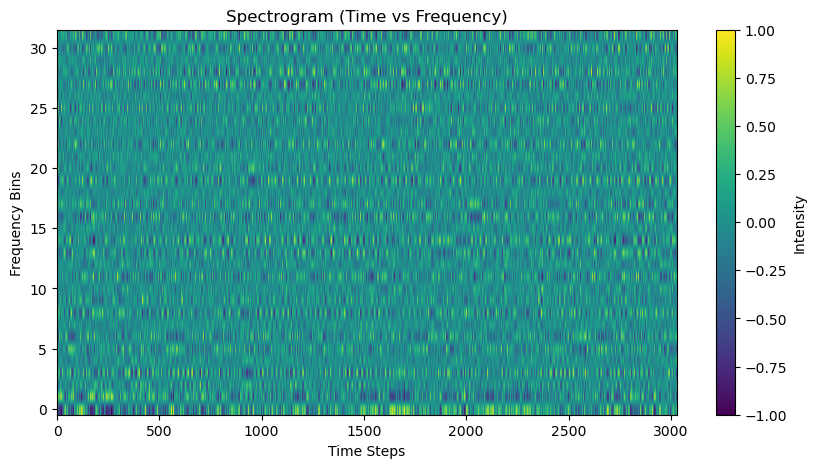

In [23]:
for epoch in range(init_epoch, args.epochs):
    model.train()
    model.epoch = epoch

    # --- train loop ---
    for i, data in enumerate(train_loader, 1):
        x_ts = data[0].to(args.device)

        print(x_ts.shape)
         
        # x_img = model.ts_to_img(x_ts)
        # img_sample = x_img[0, 0, :, :]  # Shape: (height, width)
        # # Convert to NumPy for visualization
        # img_numpy = img_sample.cpu().detach().numpy()

        # # Plot the spectrogram
        # plt.figure(figsize=(10, 5))
        # plt.imshow(img_numpy, aspect='auto', origin='lower', cmap='viridis')
        # plt.colorbar(label='Intensity')
        # plt.title("Spectrogram (Time vs Frequency)")
        # plt.xlabel("Time Steps")
        # plt.ylabel("Frequency Bins")
        # plt.show()

        
        break
    break


        # optimizer.zero_grad()
        # loss = model.loss_fn(x_img)
        # if len(loss) == 2:
        #     loss, to_log = loss
        #     for key, value in to_log.items():
        #         print(f'train/{key}', value, epoch)

        # loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
        # optimizer.step()
        # model.on_train_batch_end()



